# Example using similarity network fusion (SNF)

This is a small example on how to use the R package for SNF analysis. This example script has been modified from the one provided by the [SNFtool R package](https://cran.r-project.org/web/packages/SNFtool/README)

In [1]:
#### LIBRARIES
library(igraph)
library(SNFtool)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
#### Loading SNF data
data(Data1)
data(Data2)

In [7]:
sprintf("Data1 is a %i by %i matrix, and Data 2 is a %i by %i matrix", dim(Data1)[1], dim(Data1)[2], dim(Data2)[1], dim(Data2)[2])

[1] "Data1 is a 200 by 2 matrix, and Data 2 is a 200 by 2 matrix"

In [21]:
#### Setting parameters
K = 20 # number of neighbours
alpha = 0.5 # hyperparameter in affinityMatrix
T = 20 # number of iterations of SNF

In [11]:
truelabel = c(matrix(1,100,1),matrix(2,100,1)); ##the ground truth of the simulated data;
truelabel

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [14]:
#Standardize continuous variables
Data1 = standardNormalization(Data1);
Data2 = standardNormalization(Data2);

In [16]:
## Calculate the pair-wise distance; If the data is continuous, we recommend to use the function "dist2" as follows; if the data is discrete, we recommend the users to use ""
Dist1 = dist2(as.matrix(Data1),as.matrix(Data1));
Dist2 = dist2(as.matrix(Data2),as.matrix(Data2));

In [22]:
## next, construct similarity graphs
W1 = affinityMatrix(Dist1, K, alpha)
W2 = affinityMatrix(Dist2, K, alpha)

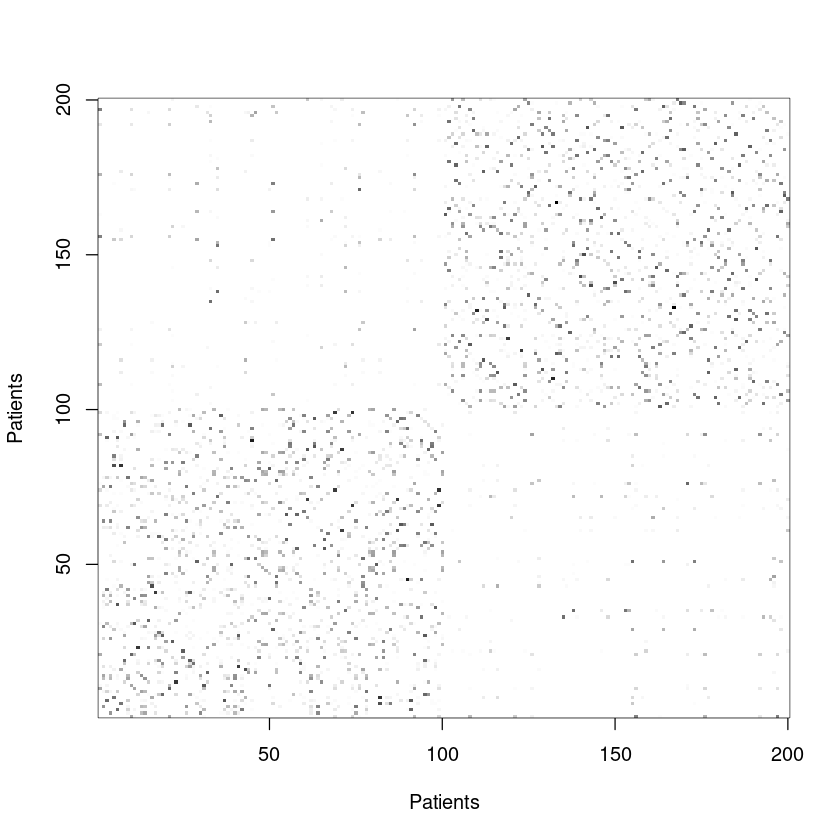

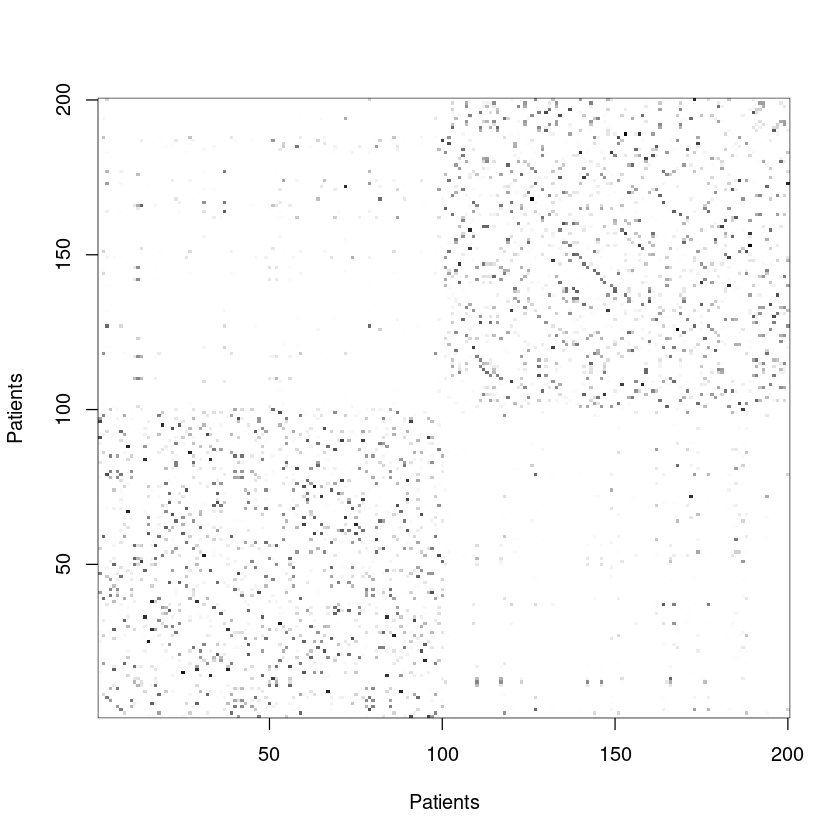

In [24]:
## These similarity graphs have complementary information about clusters.
displayClusters(W1,truelabel);
displayClusters(W2,truelabel);

In [25]:
## next, we fuse all the graphs
## then the overall matrix can be computed by similarity network fusion(SNF):
W = SNF(list(W1,W2), K, T)

In [26]:
## With this unified graph W of size n x n, you can do either spectral clustering or Kernel NMF. If you need help with further clustering, please let us know. 
## for example, spectral clustering
C = 2 					# number of clusters
group = spectralClustering(W, C); 	# the final subtypes information

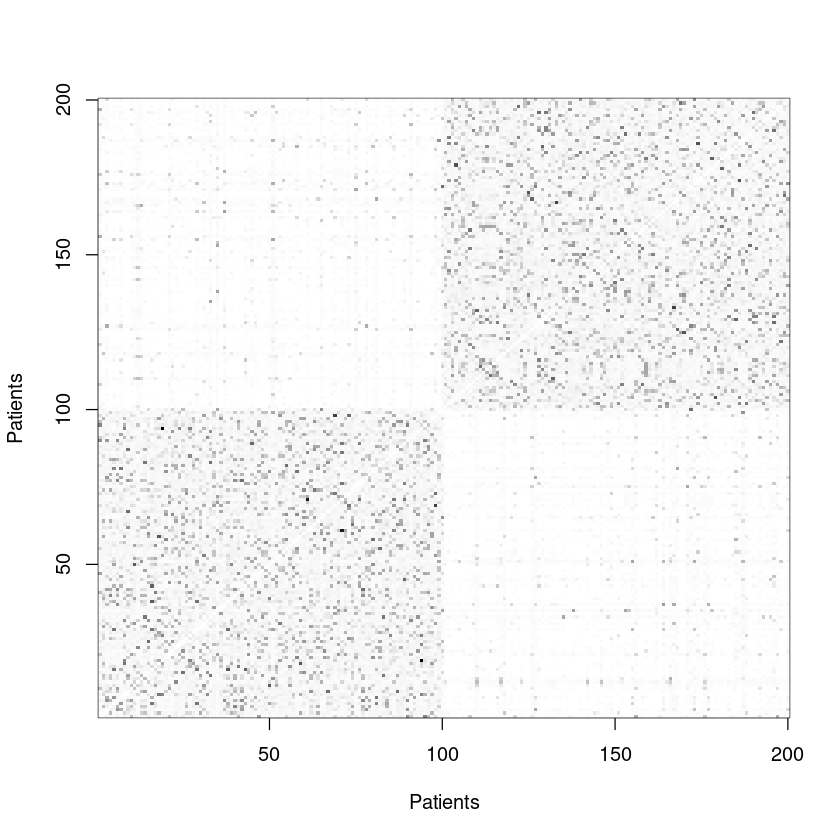

In [27]:
## you can evaluate the goodness of the obtained clustering results by calculate Normalized mutual information (NMI): 
## if NMI is close to 1, it indicates that the obtained clustering is very close to the "true" cluster information; 
## if NMI is close to 0, it indicates the obtained clustering is not similar to the "true" cluster information.

displayClusters(W, group);
SNFNMI = calNMI(group, truelabel)

In [31]:
truelabel

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [32]:
## you can also find the concordance between each individual network and the fused network
ConcordanceMatrix = concordanceNetworkNMI(list(W, W1, W2), 2);

In [33]:
ConcordanceMatrix

1.0000000,0.4371471,0.1277467
0.4371471,1.0000000,0.0605535
0.1277467,0.0605535,1.0000000


Let's compare the different networks

In [48]:
# Remove low weigths 
w1 <- W1
w2 <- W2
w3 <- W

w1[w1<1e-02] <- 0
w2[w2<1e-02] <- 0
w3[w3<1e-02] <- 0

# Plot networks
network1 <- graph_from_adjacency_matrix(w1, weighted = TRUE, mode = "undirected", diag = FALSE)
network2 <- graph_from_adjacency_matrix(w2, weighted = TRUE, mode = "undirected", diag = FALSE)
network3 <- graph_from_adjacency_matrix(w3, weighted = TRUE, mode = "undirected", diag = FALSE)

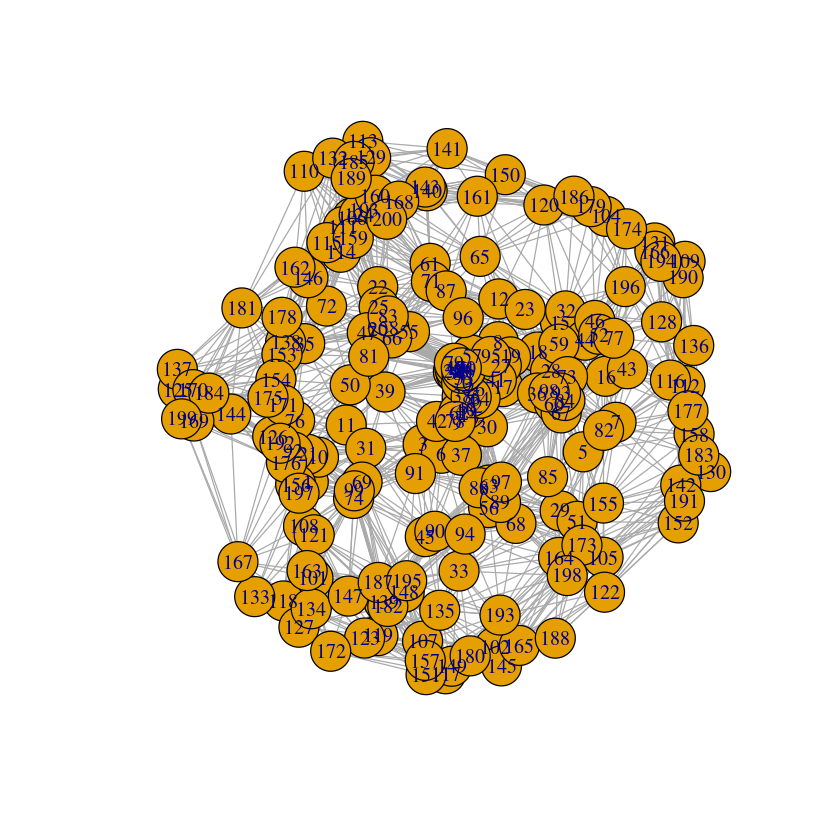

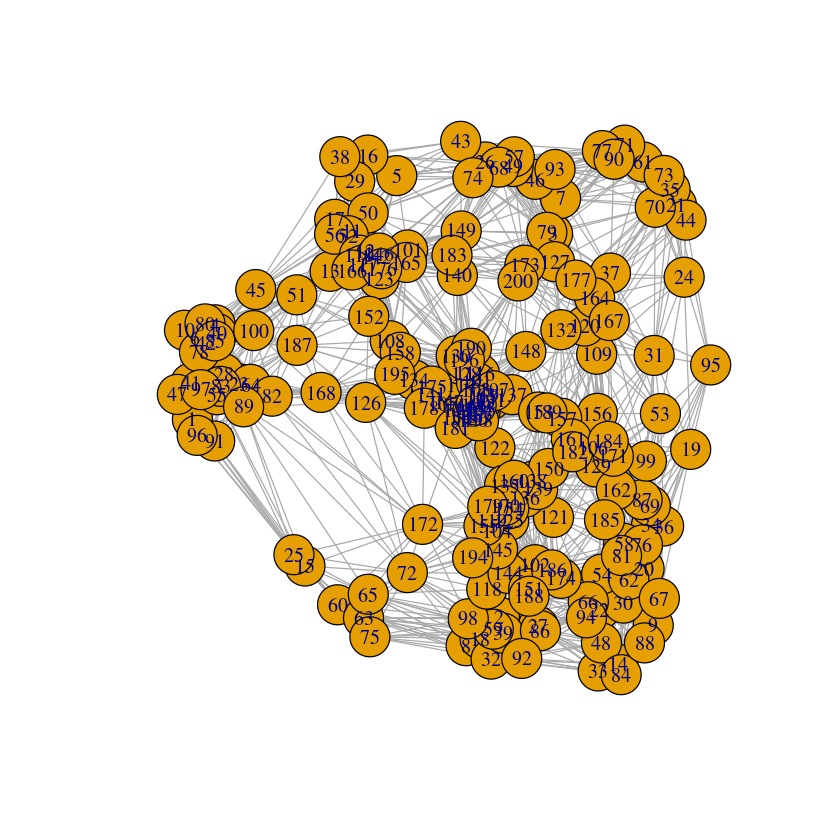

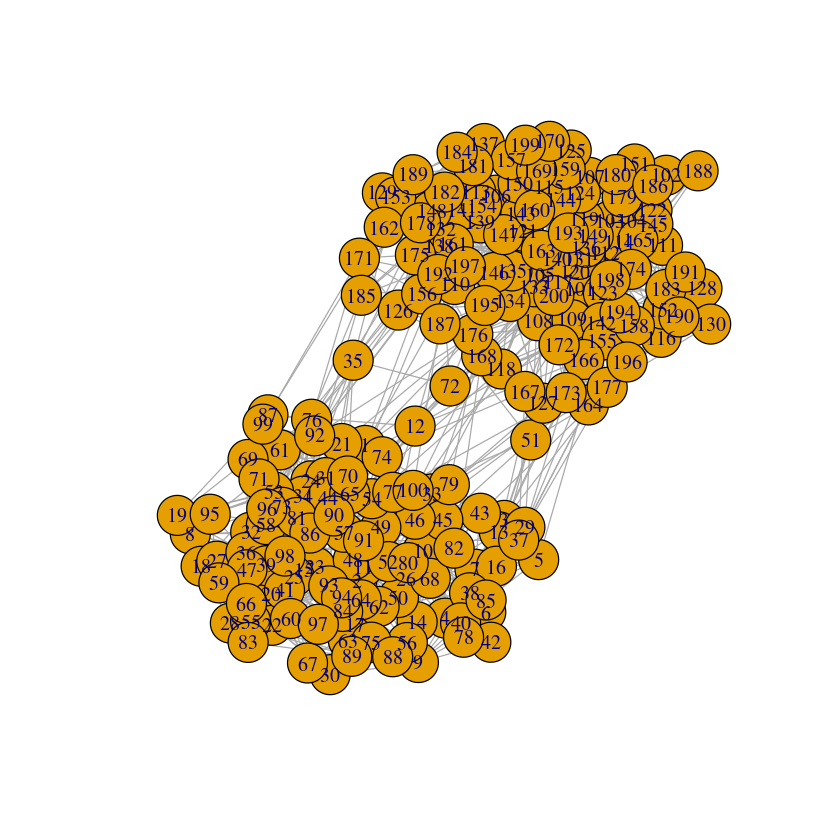

In [49]:
plot(network1)
plot(network2)
plot(network3)